In [1]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [4]:
df=pd.read_excel('/Users/hp/Desktop/Data Science/Project 1/ANZ synthesised transaction dataset.xlsx',
                 'tran',index_col =None,na_values=['NA'])

In [5]:
dk = df.copy()
dk.drop(['bpay_biller_code','merchant_id','merchant_code','merchant_suburb',
        'merchant_state','merchant_long_lat','card_present_flag'],axis=1,inplace=True)
dk['date2'] = dk['date']
dk = dk.set_index(dk['date2'])
dk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12043 entries, 2018-08-01 to 2018-10-31
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   status           12043 non-null  object        
 1   account          12043 non-null  object        
 2   currency         12043 non-null  object        
 3   long_lat         12043 non-null  object        
 4   txn_description  12043 non-null  object        
 5   first_name       12043 non-null  object        
 6   balance          12043 non-null  float64       
 7   date             12043 non-null  datetime64[ns]
 8   gender           12043 non-null  object        
 9   age              12043 non-null  int64         
 10  extraction       12043 non-null  object        
 11  amount           12043 non-null  float64       
 12  transaction_id   12043 non-null  object        
 13  country          12043 non-null  object        
 14  customer_id      1204

In [6]:
debit_things = dk[dk['movement'].isin(['debit'])]
credit_things = dk[dk['movement'].isin(['credit'])]

In [7]:
cavg = credit_things.resample('D').mean()
davg = debit_things.resample('D').mean()
davg.reset_index(level=0, inplace=True)
cavg.reset_index(level=0, inplace=True)
cavg.dropna(inplace = True)
davg.dropna(inplace = True)

In [8]:
avgtotal = dk.resample('D').mean()
avgtotal.reset_index(level=0, inplace=True)
avgtotal.dropna(inplace = True)

Plot 1

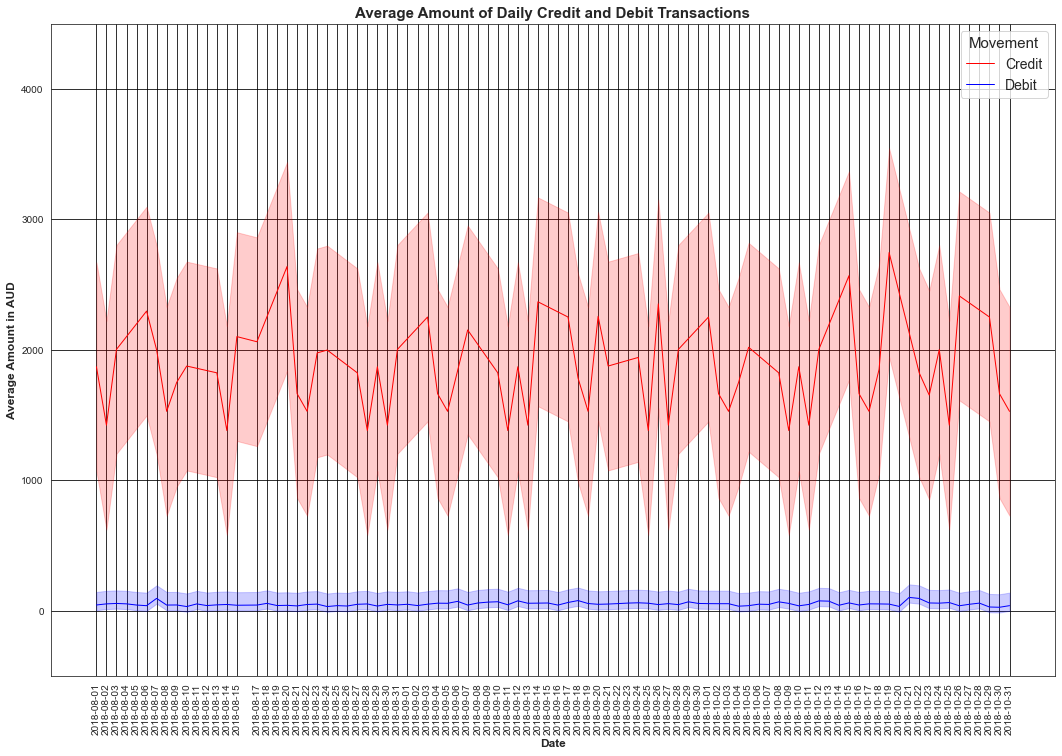

In [8]:
fig, ax = plt.subplots(figsize = (18,12))
plt.ylim(-500,4500)
ax.plot(cavg['date2'], cavg['amount'], 'r', lw = 1 ,label = 'Credit')
ax.fill_between(cavg['date2'], cavg['amount']+800,(cavg['amount']-800), color = 'red', alpha = 0.2)
ax.plot(davg['date2'], davg['amount'], 'b', lw = 1, label = 'Debit')
ax.fill_between(davg['date2'], davg['amount']+100,(davg['amount']-40), color = 'blue', alpha = 0.2)
plt.xticks(davg['date2'],rotation = 'vertical')
plt.yticks([0,1000,2000,3000,4000])
plt.grid(which = 'major', axis = 'y', color = 'black')
plt.grid(which = 'major', axis = 'x', color = 'black')
plt.ylabel('Average Amount in AUD', fontsize = 12, fontweight = 'bold')
plt.xlabel('Date', fontsize = 12, fontweight = 'bold')
plt.legend(loc = 'upper right', fontsize = 14, title = 'Movement', title_fontsize= 15, markerfirst = True, fancybox = True)
plt.title('Average Amount of Daily Credit and Debit Transactions', fontsize = 15, fontweight = 'bold', loc = 'center')
plt.show()

Plot 2

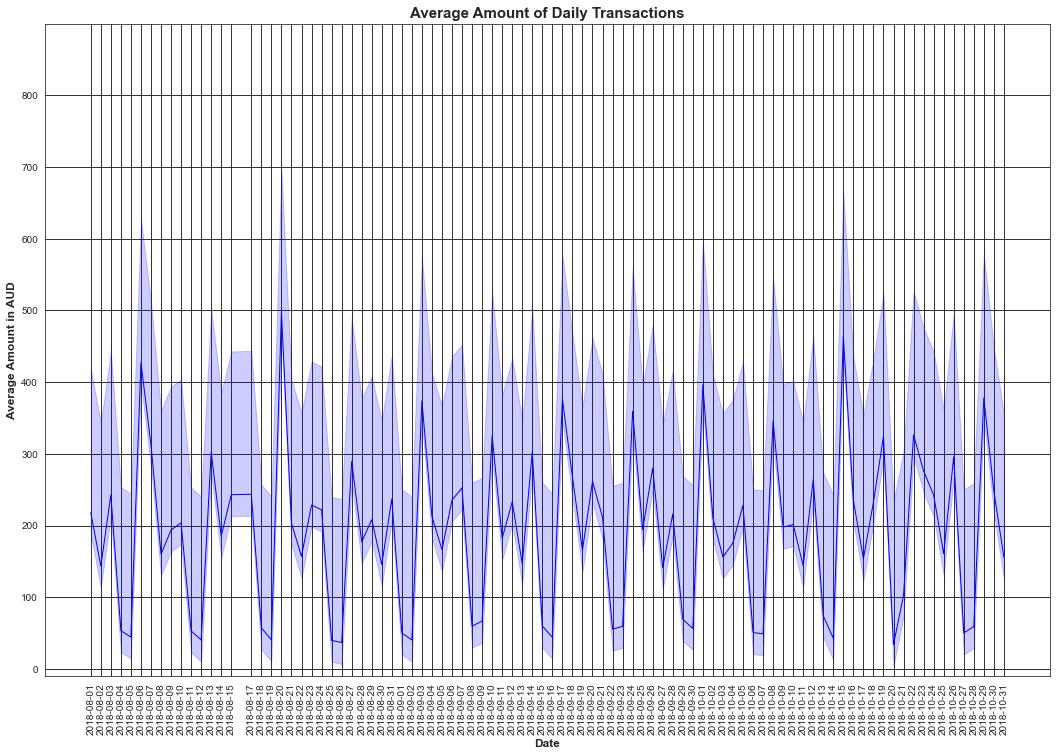

In [9]:
fig, ax = plt.subplots(figsize = (18,12))
plt.ylim(-10,900)
ax.plot(avgtotal['date2'], avgtotal['amount'], 'b', lw = 1)
ax.fill_between(avgtotal['date2'], avgtotal['amount']+200,(avgtotal['amount']-30), color = 'blue', alpha = 0.2)
plt.xticks(avgtotal['date2'],rotation = 'vertical')
plt.yticks([0,100,200,300,400,500,600,700,800])
plt.grid(which = 'major', axis = 'y', color = 'black')
plt.grid(which = 'major', axis = 'x', color = 'black')
plt.ylabel('Average Amount in AUD', fontsize = 12, fontweight = 'bold')
plt.xlabel('Date', fontsize = 12, fontweight = 'bold')
plt.title('Average Amount of Daily Transactions', fontsize = 15, fontweight = 'bold', loc = 'center')
plt.show()

Plot 3

In [10]:
list_cus = dk.customer_id.unique()
cus_cre= credit_things.groupby('customer_id').count()
cus_deb = debit_things.groupby('customer_id').count()
list_cuscre = cus_cre['movement']
list_cusdeb = cus_deb['movement']

In [ ]:
sures.loc[sures.idxmax()]

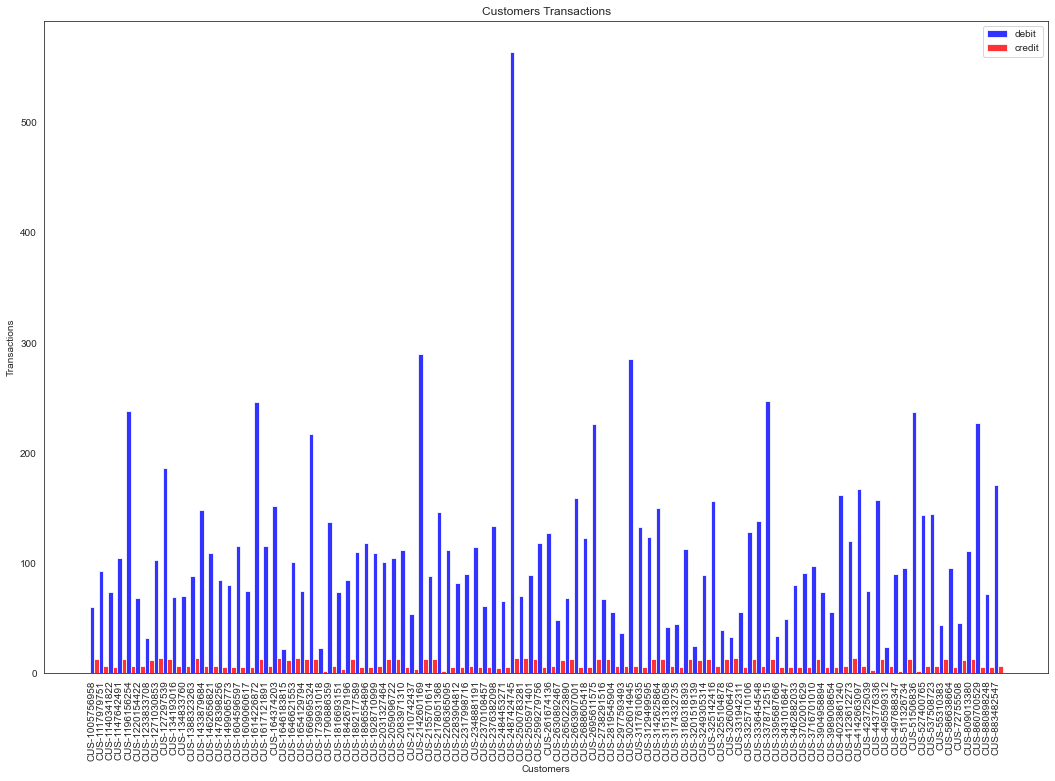

In [11]:
fig, ax = plt.subplots(figsize = (18,12))
index = cus_cre.index
width = 0.5
opacity = 0.8

rects1 = plt.bar(np.arange(len(index)), cus_deb['movement'], width,
alpha=opacity,
color='b',
label=('debit'))

rects2 = plt.bar(np.arange(len(index))+width, cus_cre['movement'], width,
alpha=opacity,
color='r',
label=('credit'))

plt.xlabel('Customers')
plt.ylabel('Transactions')
plt.title('Customers Transactions')
plt.xticks(range(0,len(index)), index, rotation = 'vertical')
plt.legend()
plt.show()

In [12]:
august_credit = credit_things.customer_id.loc['2018-08-01':'2018-08-31'].count()
august_debit = debit_things.customer_id.loc['2018-08-01':'2018-08-31'].count()
september_debit = debit_things.customer_id.loc['2018-09-01':'2018-09-30'].count()
september_credit = credit_things.customer_id.loc['2018-09-01':'2018-09-30'].count()
october_debit = debit_things.customer_id.loc['2018-10-01':'2018-10-31'].count()
october_credit = credit_things.customer_id.loc['2018-10-01':'2018-10-31'].count()
months = ['August','September','October']
debit_months = [august_debit,september_debit,october_debit]
credit_months = [august_credit,september_credit,october_credit]
upo = np.arange(0,len(months))

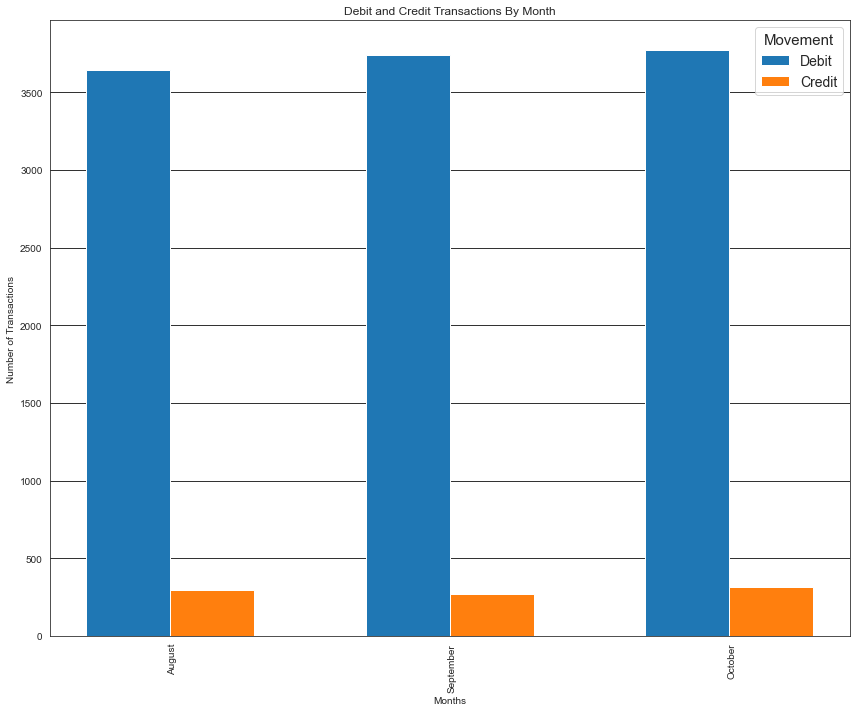

In [17]:
debit_months = [august_debit,september_debit,october_debit]
credit_months = [august_credit,september_credit,october_credit]
width =0.3
fig, ax = plt.subplots(figsize = (12,10))
plt.bar(np.arange(len(debit_months)),debit_months, width=width,align = 'center',label = 'Debit')
plt.bar(np.arange(len(credit_months))+ width, credit_months, width=width,align = 'center',label = 'Credit')
plt.grid(which = 'major', axis = 'y', color = 'black')
plt.xlabel('Months')
plt.ylabel('Number of Transactions')
plt.title('Debit and Credit Transactions By Month')
plt.xticks(upo+0.16, months, rotation = 'vertical')
plt.legend(loc = 'upper right', fontsize = 14, title = 'Movement', title_fontsize= 15, markerfirst = True, fancybox = True)
plt.tight_layout()
plt.show()

In [25]:
august = dk.loc['2018-08-01':'2018-08-31']
september = dk.loc['2018-09-01':'2018-09-30']
october = dk.loc['2018-10-01':'2018-10-31']
aug = august.groupby('customer_id')
sept = september.groupby('customer_id')
ovt = october.groupby('customer_id')
augs =aug.amount.mean()
septs = sept.amount.mean()
octs = ovt.amount.mean()
augss = august.groupby('customer_id').count()
septss = september.groupby('customer_id').count()
octss = october.groupby('customer_id').count()

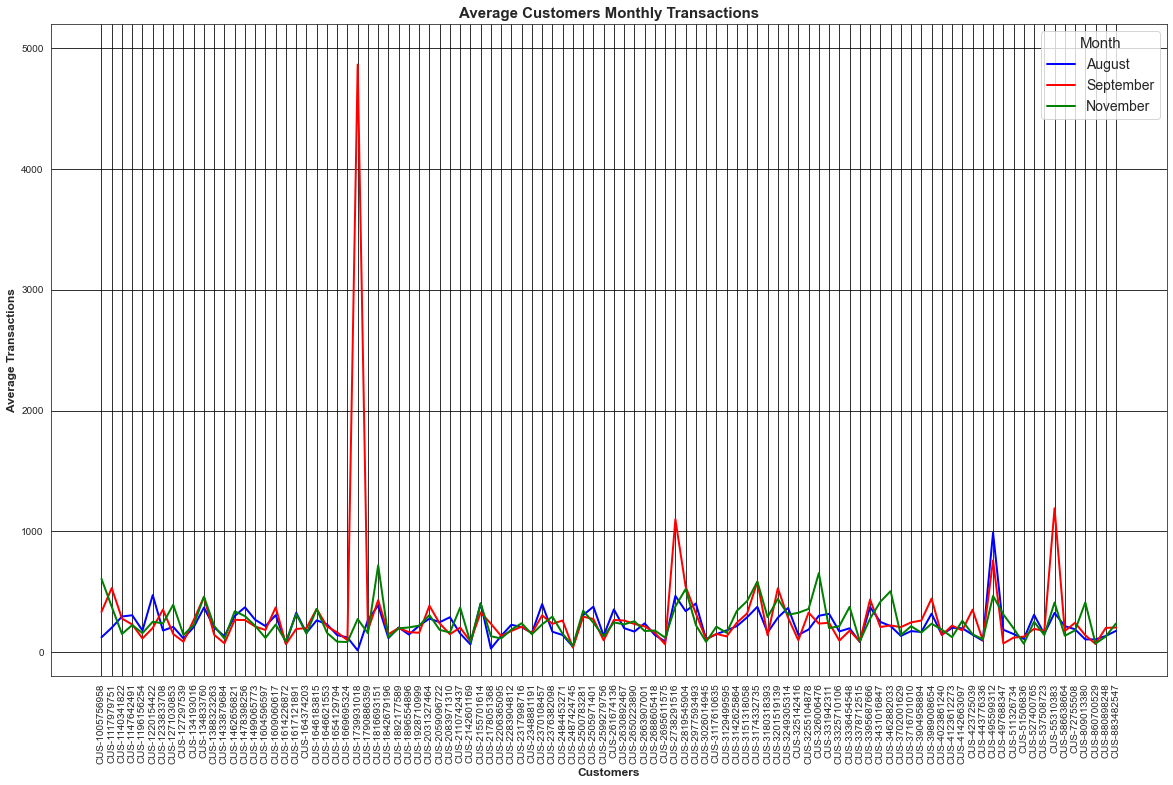

In [40]:
fig, ax = plt.subplots(figsize = (20,12))
plt.ylim(-200,5200)
ax.plot(augss.index, augs, 'b', lw = 2 ,label = 'August')
ax.plot(septss.index, septs, 'r', lw = 2, label = 'September')
ax.plot(novss.index, octs, 'g', lw = 2, label = 'November')
plt.xticks(octss.index,rotation = 'vertical')
plt.yticks([0,1000,2000,3000,4000,5000])
plt.grid(which = 'major', axis = 'y', color = 'black')
plt.grid(which = 'major', axis = 'x', color = 'black')
plt.ylabel('Average Transactions', fontsize = 12, fontweight = 'bold')
plt.xlabel('Customers', fontsize = 12, fontweight = 'bold')
plt.legend(loc = 'upper right', fontsize = 14, title = 'Month', title_fontsize= 15, markerfirst = True, fancybox = True)
plt.title('Average Customers Monthly Transactions', fontsize = 15, fontweight = 'bold', loc = 'center')
plt.show()

In [46]:
augsss = avgtotal.iloc[:30]
septsss = avgtotal.iloc[30:60]
octsss = avgtotal.iloc[60:91]

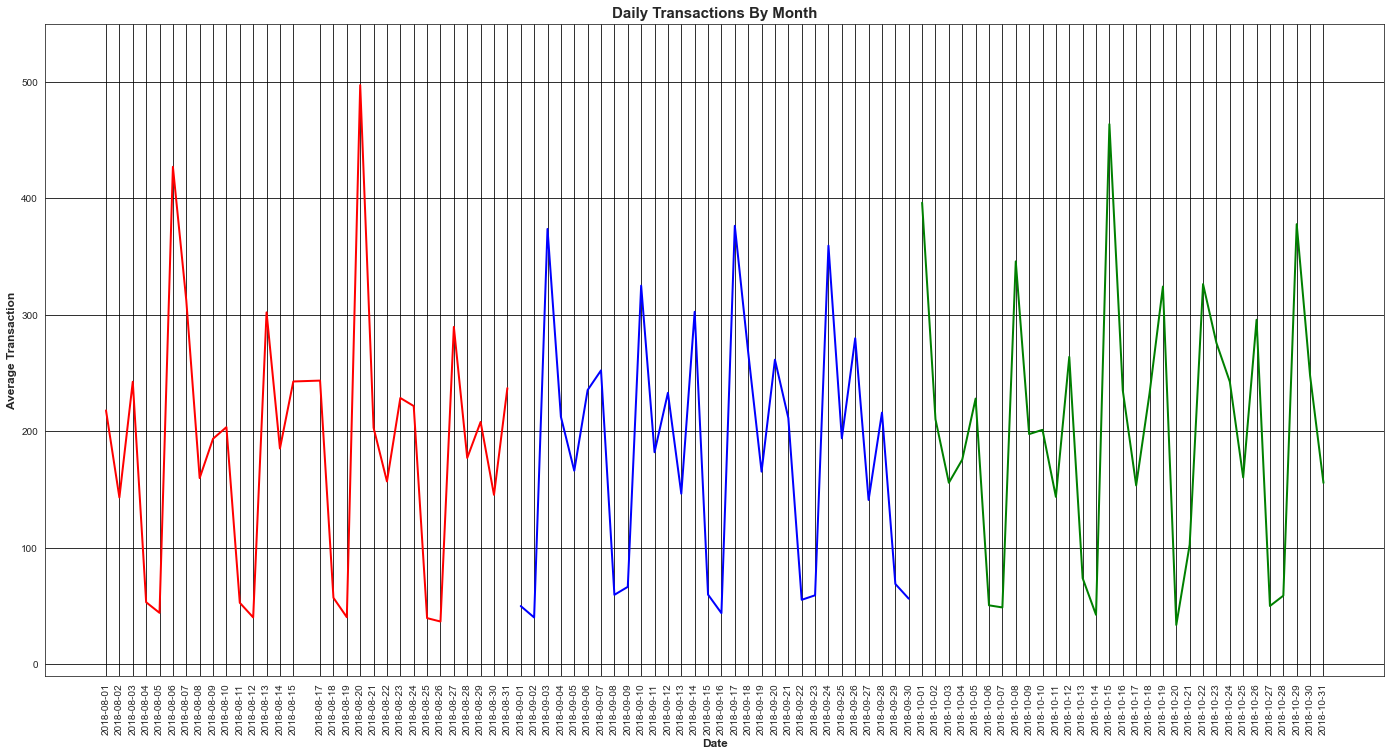

In [52]:
fig, ax = plt.subplots(figsize = (24,12))
plt.ylim(-10,550)
ax.plot(augsss.date2, augsss.amount, 'r', lw = 2,label = 'August')
ax.plot(septsss.date2, septsss.amount, 'b', lw = 2,label = 'September')
ax.plot(octsss.date2, octsss.amount, 'g', lw = 2, label = 'November')
plt.xticks(avgtotal.date2,rotation = 'vertical')
plt.yticks([0,100,200,300,400,500])
plt.grid(which = 'major', axis = 'y', color = 'black')
plt.grid(which = 'major', axis = 'x', color = 'black')
plt.ylabel('Average Transaction', fontsize = 12, fontweight = 'bold')
plt.xlabel('Date', fontsize = 12, fontweight = 'bold')
plt.title('Daily Transactions By Month', fontsize = 15, fontweight = 'bold', loc = 'center')
plt.show()

In [21]:
august_tran = dk.customer_id.loc['2018-08-01':'2018-08-31'].count()
september_tran = dk.customer_id.loc['2018-09-01':'2018-09-30'].count()
october_tran = dk.customer_id.loc['2018-10-01':'2018-10-31'].count()
months = ['August','September','October']
month_tran = [august_tran,september_tran,october_tran]

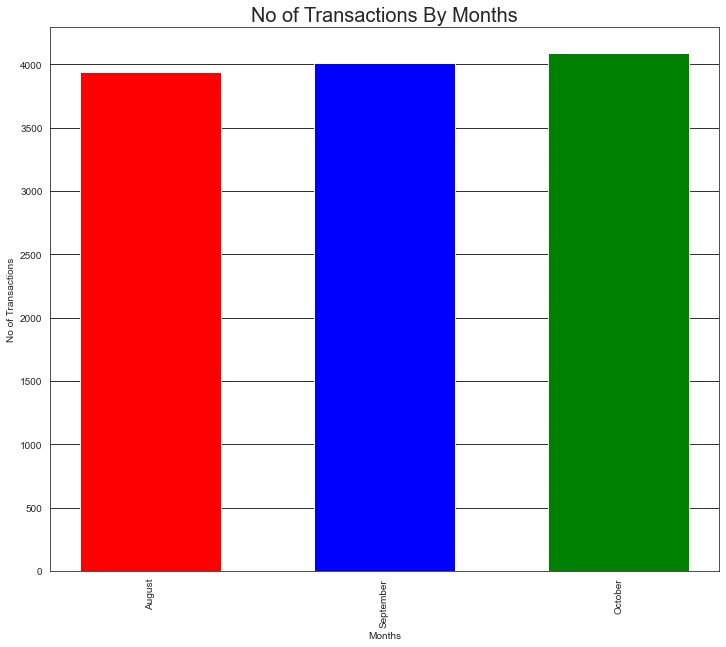

In [22]:
month_tran = [august_tran,september_tran,october_tran]
colors = ['r','b','g']
width =0.6
fig, ax = plt.subplots(figsize = (12,10))
plt.bar(np.arange(len(month_tran)),month_tran, width=width, color = colors)
plt.yticks([0,500,1000,1500,2000,2500,3000,3500,4000])
plt.grid(which = 'major', axis = 'y', color = 'black')
plt.xlabel('Months')
plt.ylabel('No of Transactions')
plt.title('No of Transactions By Months',fontsize = 20)
plt.xticks(range(0,len(months)), months, rotation = 'vertical')
plt.show()

In [23]:
october_tran

4087